# メタ分析
統計的分析のなされた複数の研究データを収集して様々な角度からデータを統合したり比較したりする分析研究法。
このデータでは都道府県別GDPのデータについて地域別に収集された体にして分析を行う。

前半参考：https://qiita.com/Hiroyuki1993/items/2e27ea86ace0462e9df0

# ライブラリのインポート

In [ ]:
!pip install pymare

In [ ]:
from pymare import meta_regression
import numpy as np
import pandas as pd

# データの読み込み

In [ ]:
df = pd.read_html("https://todo-ran.com/t/kiji/10709")[1]
df.head()

順位 都道府県    県内総生産               偏差値
  順位 都道府県      総　数   人口1人あたり     偏差値
  並替  北 南    降順 昇順     降順 昇順   降順 昇順
0  1  東京都  94.90兆円  696.58万円  100.16
1  2  愛知県  35.99兆円  479.42万円   66.47
2  3  大阪府  37.93兆円  429.46万円   58.72
3  4  山口県   5.97兆円  428.20万円   58.52
4  5  三重県   7.66兆円  423.47万円   57.79

In [ ]:
df.columns

MultiIndex([(   '順位',      '順位',    '並替'),
            ( '都道府県',    '都道府県',   '北 南'),
            ('県内総生産',     '総　数', '降順 昇順'),
            ('県内総生産', '人口1人あたり', '降順 昇順'),
            (  '偏差値',     '偏差値', '降順 昇順')],
           )

# データの整形

In [ ]:
arr = df.values
tab = []
for i in range(len(arr)):
  try:
    tab.append([int(arr[i][0]), arr[i][1], float(arr[i][2][:-2])*(1000000000000), float(arr[i][3][:-2])*10000, float(arr[i][4])])
  except:
    _ = 0
tab

[[1, '東京都', 94900000000000.0, 6965800.0, 100.16],
 [2, '愛知県', 35990000000000.0, 4794200.0, 66.47],
 [3, '大阪府', 37930000000000.0, 4294600.0, 58.72],
 [4, '山口県', 5970000000000.0, 4282000.0, 58.52],
 [5, '三重県', 7660000000000.0, 4234700.0, 57.79],
 [6, '富山県', 4450000000000.0, 4196600.0, 57.2],
 [7, '静岡県', 15440000000000.0, 4187200.0000000005, 57.05],
 [8, '栃木県', 8180000000000.0, 4162200.0000000005, 56.66],
 [9, '滋賀県', 5850000000000.0, 4137200.0000000005, 56.28],
 [10, '群馬県', 8010000000000.0, 4069900.0, 55.23],
 [11, '徳島県', 3010000000000.0, 4016400.0, 54.4],
 [12, '福井県', 3130000000000.0, 4002500.0, 54.19],
 [13, '茨城県', 11610000000000.0, 3997400.0, 54.11],
 [14, '石川県', 4590000000000.0, 3986100.0, 53.93],
 [15, '広島県', 11240000000000.0, 3961200.0, 53.55],
 [16, '福島県', 7400000000000.0, 3892600.0, 52.48],
 [17, '京都府', 10050000000000.0, 3859400.0, 51.97],
 [18, '宮城県', 8900000000000.0, 3818000.0, 51.32],
 [19, '新潟県', 8699999999999.999, 3805400.0, 51.13],
 [20, '岡山県', 7240000000000.0, 3782100.0, 50

In [ ]:
df=pd.DataFrame(tab)
df.columns=["ID","name","GDPscore","GDPperson","Dev"]
df.head()

,ID,name,GDPscore,GDPperson,Dev
0,1,東京都,9.490000e+13,6965800.0,100.16
1,2,愛知県,3.599000e+13,4794200.0,66.47
2,3,大阪府,3.793000e+13,4294600.0,58.72
3,4,山口県,5.970000e+12,4282000.0,58.52
4,5,三重県,7.660000e+12,4234700.0,57.79


# 地域別にデータを区分け(分散の計算の都合上北海道は東北にしている)


In [ ]:
kanto = df.query("name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s'"%("東京都","神奈川県","埼玉県","千葉県","茨城県","栃木県","群馬県"))
tohoku = df.query("name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s'"%("北海道","青森県","岩手県","秋田県","宮城県","山形県","福島県"))
chubu = df.query("name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s'"%("新潟県","富山県","福井県","石川県","山梨県","岐阜県","長野県","静岡県","愛知県"))
#hokkaido=df.query("name=='%s'"%("北海道"))
kinki = df.query("name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s'"%("三重県","和歌山県","滋賀県","大阪府","京都府","奈良県","兵庫県"))
chugoku = df.query("name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s'"%("鳥取県","島根県","岡山県","山口県","広島県"))
shikoku = df.query("name=='%s' or name=='%s' or name=='%s' or name=='%s'"%("香川県","愛媛県","高知県","徳島県"))
kyushu = df.query("name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s' or name=='%s'"%("沖縄県","長崎県","佐賀県","熊本県","宮崎県","鹿児島県","大分県","福岡県"))

In [ ]:
ave = np.array([np.mean(kanto["GDPscore"].values),np.mean(tohoku["GDPscore"].values),np.mean(chubu["GDPscore"].values),np.mean(kinki["GDPscore"].values),np.mean(chugoku["GDPscore"].values),np.mean(shikoku["GDPscore"].values),np.mean(kyushu["GDPscore"].values)])
var = np.array([np.var(kanto["GDPscore"].values),np.var(tohoku["GDPscore"].values),np.var(chubu["GDPscore"].values),np.var(kinki["GDPscore"].values),np.var(chugoku["GDPscore"].values),np.var(shikoku["GDPscore"].values),np.var(kyushu["GDPscore"].values)])
num = np.array([len(kanto["GDPscore"].values),len(tohoku["GDPscore"].values),len(chubu["GDPscore"].values),len(kinki["GDPscore"].values),len(chugoku["GDPscore"].values),len(shikoku["GDPscore"].values),len(kyushu["GDPscore"].values)])

In [ ]:
ave = ave.reshape(-1, 1)
var = var.reshape(-1, 1)
num = num.reshape(-1, 1)
data = np.hstack((ave, var))
data = np.hstack((data, num))
region = pd.DataFrame(data)
region.index = ["関東", "東北", "中部", "近畿", "中国", "四国", "九州"]
region.columns = ["ave", "var", "N"]
region

,ave,var,N
関東,2.771000e+13,8.078711e+26,7.0
東北,7.295714e+12,2.430997e+25,7.0
中部,1.005778e+13,9.706353e+25,9.0
近畿,1.262857e+13,1.333160e+26,7.0
中国,5.722000e+12,1.190450e+25,5.0
四国,3.447500e+12,7.920187e+23,4.0
九州,5.990000e+12,2.169695e+25,8.0


# 固定効果モデル
メタ分析において，複数の原著論文の結果からオッズ比・リスク比などの効果量を統合するときに，原著論文間の効果量＝効果+誤差と考えられるときに，固定効果モデルを使用します．

In [ ]:
region["W"] = 1 / region["var"]
region["WG"] = region["ave"] * region["W"]
res = region['WG'].sum() / region['W'].sum()
res

3883565926408.5894

In [ ]:
region

,ave,var,N,W,WG
関東,2.771000e+13,8.078711e+26,7.0,1.237821e-27,3.430002e-14
東北,7.295714e+12,2.430997e+25,7.0,4.113539e-26,3.001121e-13
中部,1.005778e+13,9.706353e+25,9.0,1.030253e-26,1.036206e-13
近畿,1.262857e+13,1.333160e+26,7.0,7.500976e-27,9.472661e-14
中国,5.722000e+12,1.190450e+25,5.0,8.400188e-26,4.806587e-13
四国,3.447500e+12,7.920187e+23,4.0,1.262596e-24,4.352801e-12
九州,5.990000e+12,2.169695e+25,8.0,4.608943e-26,2.760757e-13


# 変量効果モデル
メタ分析において，複数の原著論文の結果からオッズ比・リスク比などの効果量を統合するときに，原著論文間の効果量＝効果+研究間のバイアス+誤差と考えられるときに，変量効果モデルを使用します．Dersimonian-Laird法はこの変量効果モデルを仮定しています．

In [ ]:
ave_pred = region["ave"].mean()
Q = (region["W"] * (region["ave"] - ave_pred) ** 2).sum()
region["W2"] = region["W"] ** 2
C = region["W"].sum() - (region["W2"].sum() / region["W"].sum())
d = len(region) - 1
V_between = (Q - d) / C
region['var_str'] = region["var"] + V_between
region['W_str'] = 1 / region["var_str"]
result = (region["ave"] * region["W_str"]).sum() / region["W_str"].sum()
result

7652036288830.46

In [ ]:
region

,ave,var,N,W,WG,W2,var_str,W_str
関東,2.771000e+13,8.078711e+26,7.0,1.237821e-27,3.430002e-14,1.532201e-54,9.765685e+26,1.023994e-27
東北,7.295714e+12,2.430997e+25,7.0,4.113539e-26,3.001121e-13,1.692120e-51,1.930073e+26,5.181151e-27
中部,1.005778e+13,9.706353e+25,9.0,1.030253e-26,1.036206e-13,1.061421e-52,2.657609e+26,3.762781e-27
近畿,1.262857e+13,1.333160e+26,7.0,7.500976e-27,9.472661e-14,5.626464e-53,3.020133e+26,3.311112e-27
中国,5.722000e+12,1.190450e+25,5.0,8.400188e-26,4.806587e-13,7.056315e-51,1.806018e+26,5.537042e-27
四国,3.447500e+12,7.920187e+23,4.0,1.262596e-24,4.352801e-12,1.594150e-48,1.694894e+26,5.900075e-27
九州,5.990000e+12,2.169695e+25,8.0,4.608943e-26,2.760757e-13,2.124235e-51,1.903943e+26,5.252258e-27


# 制限付き最尤

In [ ]:
res = meta_regression(region["ave"].values, region["var"].values, region["WG"].values, X_names=["RegionGDP"], add_intercept=True, method="REML")
print(res.to_df())

        name      estimate            se   z-score   p-value      ci_0.025  \
0  intercept  3.883566e+12  8.296358e+11  4.681049  0.000003  2.257510e+12   
1  RegionGDP  1.487039e+01  3.176721e+00  4.681049  0.000003  8.644128e+00   

       ci_0.975  
0  5.509622e+12  
1  2.109664e+01  


In [ ]:
from pymare import Dataset
from pymare.estimators import VarianceBasedLikelihoodEstimator as VBLE

In [ ]:
dataset = Dataset(region["ave"].values, region["var"].values, region["WG"].values)
estimator = VBLE(method='REML')
estimator.fit_dataset(dataset)
results = estimator.summary()
print(results.to_df())

        name      estimate            se   z-score   p-value      ci_0.025  \
0  intercept  3.883566e+12  8.296358e+11  4.681049  0.000003  2.257510e+12   
1          0  1.487039e+01  3.176721e+00  4.681049  0.000003  8.644128e+00   

       ci_0.975  
0  5.509622e+12  
1  2.109664e+01  


# 信頼区間と外れ値

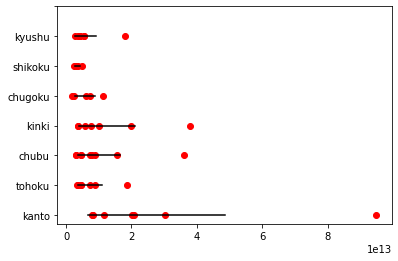

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
label = ["kanto", "tohoku", "chubu", "kinki", "chugoku", "shikoku", "kyushu"]
pos=[0, 1, 2, 3, 4, 5, 6, 7]
for i in range(len(region.values)):
  var = region["var"][i]
  ave = region["ave"][i]
  num = region["N"][i]
  nrange = stats.norm(loc=ave, scale=np.sqrt(var/num))
  low,high = nrange.interval(alpha=0.95)
  plt.plot([low,high], [i, i], color="#000000")
plt.scatter(kanto["GDPscore"].values, np.zeros_like(kanto["GDPscore"])+0, color="#FF0000")
plt.scatter(tohoku["GDPscore"].values, np.zeros_like(tohoku["GDPscore"])+1, color="#FF0000")
plt.scatter(chubu["GDPscore"].values, np.zeros_like(chubu["GDPscore"])+2, color="#FF0000")
plt.scatter(kinki["GDPscore"].values, np.zeros_like(kinki["GDPscore"])+3, color="#FF0000")
plt.scatter(chugoku["GDPscore"].values, np.zeros_like(chugoku["GDPscore"])+4, color="#FF0000")
plt.scatter(shikoku["GDPscore"].values, np.zeros_like(shikoku["GDPscore"])+5, color="#FF0000")
plt.scatter(kyushu["GDPscore"].values, np.zeros_like(kyushu["GDPscore"])+6, color="#FF0000")
plt.yticks(pos, label)
plt.show()